<a href="https://colab.research.google.com/github/Elsecaler/churn/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coleta de Dados

In [88]:
import pandas as pd

In [89]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [90]:
df.describe().round(4)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0000,1.000000e+04,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,5000.5000,1.569094e+07,650.5288,38.9218,5.0128,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,2886.8957,7.193619e+04,96.6533,10.4878,2.8922,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,1.0000,1.556570e+07,350.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,2500.7500,1.562853e+07,584.0000,32.0000,3.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,5000.5000,1.569074e+07,652.0000,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,7500.2500,1.575323e+07,718.0000,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000
max,10000.0000,1.581569e+07,850.0000,92.0000,10.0000,250898.0900,4.0000,1.0000,1.0000,199992.4800,1.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f069caaa890>,
      dtype=object)

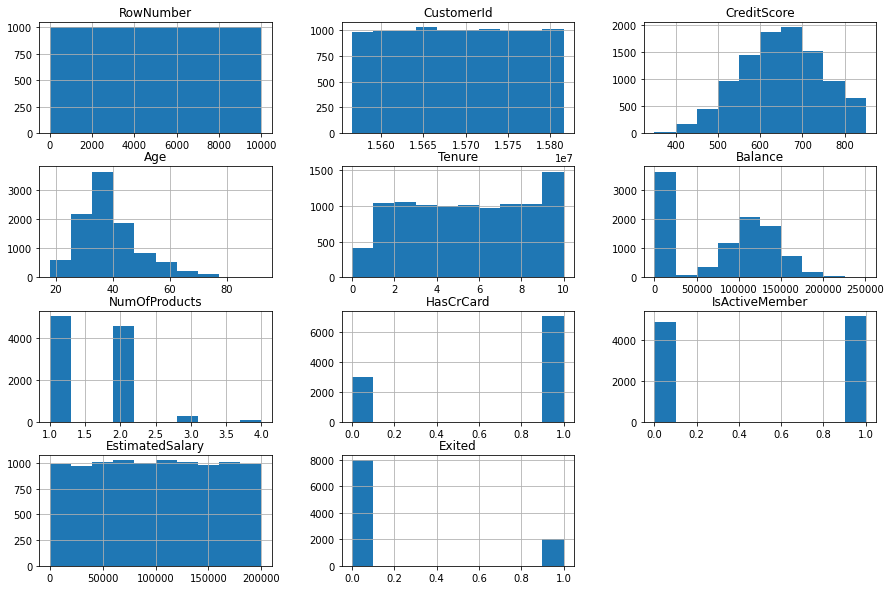

In [91]:
df.hist(figsize = (15, 10))

In [92]:
import numpy as np
import seaborn as sns

In [93]:
myred = '#CD5C5C'
myblue = '#6495ED'
mygreen = '#90EE90'
cols = [myred, myblue, mygreen]

In [94]:
df['Exited'].sum()/df['Exited'].count()

0.2037

## Variáveis Categóricas

In [95]:
df['Gender'] = df['Gender'].replace(['Female', 'Male'], ['Feminino', 'Masculino'])

In [96]:
df_plot = df.groupby('Gender').Exited.mean().reset_index()
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


Text(0, 0.5, 'Taxa de Churn')

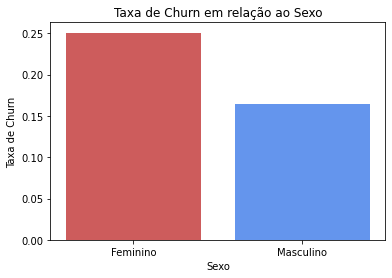

In [97]:
import matplotlib.pyplot as plt

x = df_plot['Gender']
y = df_plot['Exited']
plt.bar(x, y, color = cols)
plt.title('Taxa de Churn em relação ao Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Churn')

Mulheres tem maiores tendências de cancelamento que homens.

In [98]:
df['Geography'] = df.Geography.replace(['France', 'Germany', 'Spain'], ['França', 'Alemanha', 'Espanha'])
df_plot = df.groupby('Geography').Exited.mean().reset_index()
df_plot

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


Das pessoas que moram na Alemanha, aproximadamente 32% cancela o cartão.

In [99]:
df['HasCrCard'] = df['HasCrCard'].replace([0, 1], ['Não', 'Sim'])
df_plot = df.groupby('HasCrCard').Exited.mean().reset_index()
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


Text(0, 0.5, 'Taxa de Churn')

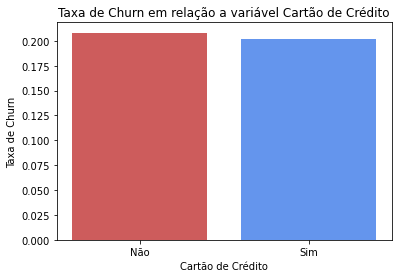

In [100]:
x = df_plot['HasCrCard']
y = df_plot['Exited']
plt.bar(x, y, color = cols)
plt.title('Taxa de Churn em relação a variável Cartão de Crédito')
plt.xlabel('Cartão de Crédito')
plt.ylabel('Taxa de Churn')

Se a pessoa tiver cartão de crédito tem um pouco menos de chance de cancelar a conta.

Text(0, 0.5, 'Taxa de Churn')

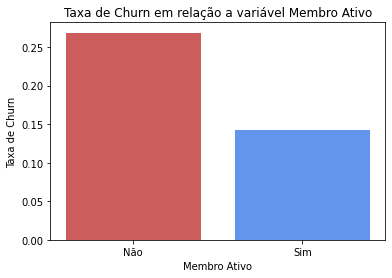

In [101]:
df['IsActiveMember'] = df['IsActiveMember'].replace([0, 1], ['Não', 'Sim'])
df_plot = df.groupby('IsActiveMember').Exited.mean().reset_index()
x = df_plot['IsActiveMember']
y = df_plot['Exited']
plt.bar(x, y, color = cols)
plt.title('Taxa de Churn em relação a variável Membro Ativo')
plt.xlabel('Membro Ativo')
plt.ylabel('Taxa de Churn')

In [102]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

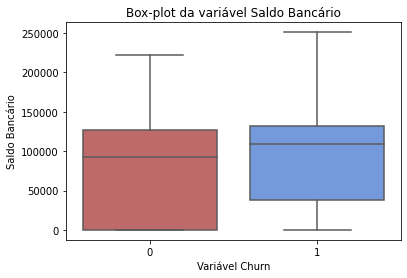

In [103]:
cols = [myred, myblue, mygreen]
sns.boxplot(x = 'Exited', y = 'Balance', data = df, palette = cols)
plt.title('Box-plot da variável Saldo Bancário')
plt.xlabel('Variável Churn')
plt.ylabel('Saldo Bancário')
df.groupby(['Exited'])['Balance'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

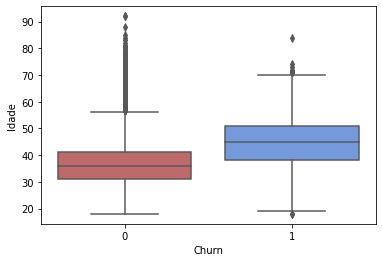

In [104]:
sns.boxplot(x = 'Exited', y = 'Age', data = df, palette = cols)
plt.xlabel('Churn')
plt.ylabel('Idade')
df.groupby(['Exited'])['Age'].mean()

Pessoas mais velhas tendem a sair mais do banco que pessoas mais novas.

## Pré Processamento

In [105]:
df1 = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,França,Feminino,42,2,0.00,1,Sim,Sim,101348.88,1
1,608,Espanha,Feminino,41,1,83807.86,1,Não,Sim,112542.58,0
2,502,França,Feminino,42,8,159660.80,3,Sim,Não,113931.57,1
3,699,França,Feminino,39,1,0.00,2,Não,Não,93826.63,0
4,850,Espanha,Feminino,43,2,125510.82,1,Sim,Sim,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Masculino,39,5,0.00,2,Sim,Não,96270.64,0
9996,516,França,Masculino,35,10,57369.61,1,Sim,Sim,101699.77,0
9997,709,França,Feminino,36,7,0.00,1,Não,Sim,42085.58,1
9998,772,Alemanha,Masculino,42,3,75075.31,2,Sim,Não,92888.52,1


## Dados Faltantes

In [106]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Não há dados faltantes neste conjunto de dados.

In [107]:
y = df1['Exited']
X = df1
X = df1.drop('Exited', axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,Feminino,42,2,0.00,1,Sim,Sim,101348.88
1,608,Espanha,Feminino,41,1,83807.86,1,Não,Sim,112542.58
2,502,França,Feminino,42,8,159660.80,3,Sim,Não,113931.57
3,699,França,Feminino,39,1,0.00,2,Não,Não,93826.63
4,850,Espanha,Feminino,43,2,125510.82,1,Sim,Sim,79084.10


In [108]:
x_cont = ['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']
x_cont

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [109]:
x_cat = list(set(X) - set(x_cont))
x_cat
x_dummies = X[x_cat]
x_dummies

,Gender,IsActiveMember,NumOfProducts,HasCrCard,Geography
0,Feminino,Sim,1,Sim,França
1,Feminino,Sim,1,Não,Espanha
2,Feminino,Não,3,Sim,França
3,Feminino,Não,2,Não,França
4,Feminino,Sim,1,Sim,Espanha
...,...,...,...,...,...
9995,Masculino,Não,2,Sim,França
9996,Masculino,Sim,1,Sim,França
9997,Feminino,Sim,1,Não,França
9998,Masculino,Não,2,Sim,Alemanha


In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,0,42,2,0.00,1,Sim,Sim,101348.88
1,608,Espanha,0,41,1,83807.86,1,Não,Sim,112542.58
2,502,França,0,42,8,159660.80,3,Sim,Não,113931.57
3,699,França,0,39,1,0.00,2,Não,Não,93826.63
4,850,Espanha,0,43,2,125510.82,1,Sim,Sim,79084.10
5,645,Espanha,1,44,8,113755.78,2,Sim,Não,149756.71
6,822,França,1,50,7,0.00,2,Sim,Sim,10062.80
7,376,Alemanha,0,29,4,115046.74,4,Sim,Não,119346.88
8,501,França,1,44,4,142051.07,2,Não,Sim,74940.50
9,684,França,1,27,2,134603.88,1,Sim,Sim,71725.73


In [111]:
x_final = pd.get_dummies(data = X, columns = ['Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])
x_final

,CreditScore,Gender,Age,Tenure,Balance,EstimatedSalary,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_Não,HasCrCard_Sim,IsActiveMember_Não,IsActiveMember_Sim
0,619,0,42,2,0.00,101348.88,0,0,1,1,0,0,0,0,1,0,1
1,608,0,41,1,83807.86,112542.58,0,1,0,1,0,0,0,1,0,0,1
2,502,0,42,8,159660.80,113931.57,0,0,1,0,0,1,0,0,1,1,0
3,699,0,39,1,0.00,93826.63,0,0,1,0,1,0,0,1,0,1,0
4,850,0,43,2,125510.82,79084.10,0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,96270.64,0,0,1,0,1,0,0,0,1,1,0
9996,516,1,35,10,57369.61,101699.77,0,0,1,1,0,0,0,0,1,0,1
9997,709,0,36,7,0.00,42085.58,0,0,1,1,0,0,0,1,0,0,1
9998,772,1,42,3,75075.31,92888.52,1,0,0,0,1,0,0,0,1,1,0


In [112]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_final, y, test_size = 0.2, random_state = 1)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,EstimatedSalary,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_Não,HasCrCard_Sim,IsActiveMember_Não,IsActiveMember_Sim
2694,628,1,29,3,113146.98,124749.08,1,0,0,0,1,0,0,1,0,0,1
5140,626,0,29,4,105767.28,41104.82,0,0,1,0,1,0,0,1,0,1,0
2568,612,0,47,6,130024.87,45750.21,1,0,0,1,0,0,0,0,1,0,1
3671,646,0,52,6,111739.40,68367.18,1,0,0,0,1,0,0,1,0,0,1
7427,714,1,33,8,122017.19,162515.17,0,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,621,1,47,7,107363.29,66799.28,1,0,0,1,0,0,0,0,1,0,1
7813,684,0,63,3,81245.79,69643.31,1,0,0,1,0,0,0,0,1,1,0
905,672,0,45,9,0.00,92027.69,0,0,1,1,0,0,0,0,1,0,1
5192,663,0,39,8,0.00,101168.90,0,0,1,0,1,0,0,0,1,0,1


In [113]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

## Ajuste

In [114]:
from matplotlib.gridspec import GridSpec
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state = 61658)

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9],
}

grid = GridSearchCV(
    dt,
    params,
    cv = 10,
    scoring = 'roc_auc',
    verbose = 10,
    n_jobs = 1
)

grid.fit(x_treino, y_treino)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 1/10; 1/16] END criterion=gini, max_depth=2;, score=0.726 total time=   0.0s
[CV 2/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 2/10; 1/16] END criterion=gini, max_depth=2;, score=0.760 total time=   0.0s
[CV 3/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 3/10; 1/16] END criterion=gini, max_depth=2;, score=0.712 total time=   0.0s
[CV 4/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 4/10; 1/16] END criterion=gini, max_depth=2;, score=0.718 total time=   0.0s
[CV 5/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 5/10; 1/16] END criterion=gini, max_depth=2;, score=0.744 total time=   0.0s
[CV 6/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 6/10; 1/16] END criterion=gini, max_depth=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='roc_auc', verbose=10)

In [115]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [116]:
grid.best_score_

0.8332790402462347

In [117]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=61658)

In [118]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_teste, grid.predict_proba(x_teste)[:, 1])

0.8560495610201055

A acurácia do modelo foi de 85.6%.